Nota generada a partir de [liga](https://www.dropbox.com/s/qb3swgkpaps7yba/4.1.Introduccion_optimizacion_convexa.pdf?dl=0), [liga2](https://www.dropbox.com/s/6isby5h1e5f2yzs/4.2.Problemas_de_optimizacion_convexa.pdf?dl=0).

# Optimización Numérica y machine learning

**Optimización de código ¿es optimización numérica?**

Hasta este módulo hemos invertido buena parte del tiempo del curso en la eficiente implementación en el hardware que poseemos. Revisamos lo que estudia el análisis numérico o cómputo científico, definiciones de funciones, derivadas, integrales y métodos o algoritmos numéricos para su aproximación. Consideramos *bottlenecks* que pueden surgir en la implementación de los métodos o algoritmos y revisamos posibles opciones para encontrarlos y minimizarlos (**optimización de código**). Lo anterior lo resumimos con el uso de herramientas como: perfilamiento, integración de R y Python con C++ o C, cómputo en paralelo y uso del caché de forma eficiente al usar niveles altos en operaciones de BLAS ([módulo I: cómputo científico y análisis numérico](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico), [módulo II: cómputo en paralelo](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/tree/master/temas/II.computo_paralelo), [módulo III: cómputo matricial](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/tree/master/temas/III.computo_matricial)). 

Si bien la optimización de código no le compete a la **optimización numérica**, sí se apoya enormemente de ella para la implementación de sus métodos o algoritmos en la(s) máquina(s) para resolver problemas que surgen en tal rama de las **matemáticas aplicadas**. A la implementación y simulación en el desarrollo de los métodos o algoritmos del análisis numérico o cómputo científico típicamente se le acompaña de estudios que realizan [benchmarks](https://en.wikipedia.org/wiki/Benchmark_(computing)), mediciones de recursos (tiempo y memoria por ejemplo) y perfilamiento con el objetivo de tener **software confiable y eficiente** en la práctica. Esto lo encontramos también en la rama de optimización numérica con los métodos o algoritmos que son desarrollados e implementados.

**Métodos o algoritmos numéricos en *big data***

La implementación de los métodos o algoritmos en el contexto de **grandes cantidades de datos** o *big data* es **crítica** al ir a la práctica pues de esto depende que nuestra(s) máquina(s) tarde meses, semanas, días u horas para resolver problemas que se presentan en este contexto. La ciencia de datos apunta al desarrollo de técnicas y se apoya de aplicaciones de *machine learning* para la extracción de conocimiento útil y toma como fuente de información las grandes cantidades de datos. 

## ¿Problemas de optimización numérica?

Una gran cantidad de aplicaciones plantean problemas de optimización matemática o numérica. Tenemos problemas básicos que se presentan en cursos iniciales de cálculo:

*Una caja con base y tapa cuadradas debe tener un volumen de $100 cm^3$. Encuentre las dimensiones de la caja que minimicen la cantidad de material.*

Y tenemos más especializados que encontramos en áreas como estadística, ingeniería, finanzas o *machine learning*:

* Ajustar un modelo de regresión lineal a un conjunto de datos.

* Buscar la mejor forma de invertir un capital en un conjunto de activos.

* Elección del ancho y largo de un dispositivo en un circuito electrónico.

* Ajustar un modelo que clasifique un conjunto de datos.

En general un problema de optimización matemática o numérica tiene la forma:

$$\displaystyle \min_{x \in \mathbb{R}^n} f_o(x)$$

$$\text{sujeto a:} f_i(x) \leq b_i, i=1,\dots, m$$

donde: $x=(x_1,x_2,\dots, x_n)^T$ es la **variable de optimización del problema**, la función $f_o: \mathbb{R}^{n} \rightarrow \mathbb{R}$ es la **función objetivo**, las funciones $f_i: \mathbb{R}^n \rightarrow \mathbb{R}, i=1,\dots,m$ son las **funciones de restricción** (aquí se colocan únicamente desigualdades pero pueden ser sólo igualdades o bien una combinación de ellas) y las constantes $b_1,b_2,\dots, b_m$ son los **límites o cotas de las restricciones**. 

Un vector $x^* \in \mathbb{R}^n$ es nombrado **óptimo** o solución del problema anterior si tiene el valor más pequeño de entre todos los vectores $x \in \mathbb{R}^n$ que satisfacen las restricciones. Por ejemplo, si $z \in \mathbb{R}^n$ satisface $f_1(z) \leq b_1, f_2(z) \leq b_2, \dots, f_m(z) \leq b_m$ y $x^*$ es óptimo entonces $f_o(z) \geq f_o(x^*)$.

**Comentario:** en el curso revisamos métodos o algoritmos de optimización numérica que consideran funciones objetivo $f_o: \mathbb{R} \rightarrow \mathbb{R}^n$. Sin embargo, hay formulaciones que utilizan $f_o: \mathbb{R}^n \rightarrow \mathbb{R}^q$. Tales formulaciones pueden hallarlas en la optimización multicriterio, multiobjetivo, vectorial o Pareto. Ver [Multi objective optimization](https://en.wikipedia.org/wiki/Multi-objective_optimization).

**Ejemplo:**

$$\displaystyle \min_{x \in \mathbb{R}^n} ||x||_2$$

$$\text{sujeto a:} Ax \leq b$$


con $A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^m$. En este problema buscamos el vector $x$ que es solución del problema $Ax \leq b$ con mínima norma Euclidiana. La función objetivo es $f_o(x)=||x||_2$, las funciones de restricción son las desigualdades lineales $f_i(x) = a_i^Tx \leq b_i$ con $a_i$ $i$-ésimo renglón de $A$ y $b_i$ $i$-ésima componente de $b$, $\forall i=1,\dots,m$.

Un problema similar al anterior lo podemos encontrar en resolver el sistema de ecuaciones lineales $Ax=b$ *underdetermined* en el que $m < n$ y se busca el vector $x$ con mínima norma Euclidiana que satisfaga tal sistema. Tal sistema puede tener infinitas soluciones o ninguna solución, ver [3.3.Solucion_de_SEL_y_FM](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/III.computo_matricial/3.3.Solucion_de_SEL_y_FM.ipynb).

## ¿Machine learning, statistical machine learning y optimización numérica?

En esta sección relacionamos a *machine learning* con la optimización matemática o numérica y se describen diferentes enfoques que se han propuesto para aplicaciones de *machine learning* con métodos de optimización numérica. Lo siguiente **no** pretende ser una exposición extensa **ni** completa sobre *machine learning*, ustedes llevan materias que se enfocan esencialmente a definir esta área, sus objetivos y conceptos más importantes. 

En la ciencia de datos se utilizan las aplicaciones desarrolladas en *machine learning* por ejemplo:

* Clasificación de documentos o textos: detección de *spam*.

* Procesamiento de lenguaje natural:  [named-entity recognition](https://en.wikipedia.org/wiki/Named-entity_recognition).

* Reconocimiento de voz.

* [Visión por computadora](https://en.wikipedia.org/wiki/Computer_vision): reconocimiento de rostros o imágenes.

* Detección de fraude.

* Diagnóstico médico.

* Sistemas de recomendación.


Las aplicaciones anteriores involucran problemas como son:

* Clasificación.

* Regresión.

* *Ranking*.

* *Clustering*.

* Reducción de la dimensionalidad.

En cada una de las aplicaciones o problemas anteriores se utilizan **funciones de pérdida** que guían el proceso de aprendizaje. Tal proceso involucra **optimización numérica de parámetros** de la función de pérdida. Por ejemplo, si la función de pérdida en un problema de regresión es una pérdida cuadrática $\mathcal{L}(y,\hat{y}) = (\hat{y}-y)^2$ con $\hat{y} = \hat{\beta}_0 + \beta_1x$, entonces el vector de parámetros a optimizar (aprender) es $
\beta=
\left[ \begin{array}{c}
\beta_0\\
\beta_1
\end{array}
\right]
$.

*Machine learning* no sólo se apoya de la optimización matemática o numérica pues es un área de Inteligencia Artificial\* que utiliza técnicas estadísticas para el diseño de sistemas capaces de aplicaciones como las escritas anteriormente, de modo que hoy en día tenemos *statistical machine learning*. No obstante, uno de los **pilares** de *machine learning* o *statistical machine learning* es la optimización matemática o numérica.

\*La IA o inteligencia artificial es una rama de las ciencias de la computación que atrajo un gran interés en $1950$.

*Machine learning* o *statistical machine learning* se apoya de las formulaciones y algoritmos en optimización matemática o numérica. Sin embargo, también ha contribuido a ésta área desarrollando nuevos enfoques en los métodos o algoritmos numéricos de optimización para el tratamiento de las grandes cantidades de datos o *big data* y estableciendo retos significativos no presentes en problemas clásicos de optimización matemática o numérica. De hecho, al revisar literatura que intersecta estas dos disciplinas encontramos comunidades científicas que desarrollan o utilizan métodos o algoritmos exactos (ver [Exact algorithm](https://en.wikipedia.org/wiki/Exact_algorithm)) y otras que utilizan métodos de optimización estocástica (ver [Stochastic optimization](https://en.wikipedia.org/wiki/Stochastic_optimization)) basados en métodos o algoritmos aproximados (ver [Approximation algorithm](https://en.wikipedia.org/wiki/Approximation_algorithm)).

## ¿Large scale machine learning?

En *machine learning* uno de los objetivos bien definido es encontrar soluciones que generalicen y provean una explicación no compleja del fenómeno en estudio\*. Esto sigue el principio de la navaja de Occam, ver [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor): para cualquier conjunto de observaciones en general se prefieren explicaciones simples a explicaciones más complicadas. Un ejemplo de técnica utilizada en *machine leargning* es **regularización** la cual sigue el principio de Occam.

El inicio del siglo XXI estuvo marcado, entre otros temas, por un incremento significativo en la generación de información. Esto puede contrastarse con el desarrollo de los procesadores de las máquinas como se revisó en el  módulo II del curso en el tema [2.1.Un_poco_de_historia_y_generalidades](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/II.computo_paralelo/2.1.Un_poco_de_historia_y_generalidades.ipynb). Asimismo, las mejoras en el performance y precio de dispositivos de almacenamiento o *storage* y sistemas de networking abarató costos de almacenamiento y permitió tal incremento de información.  En este contexto, los modelos y métodos de *statistical machine learning* se vieron limitados por el tiempo de cómputo y no por el tamaño de muestra. La conclusión de esto fue el diseño de métodos o modelos para procesar grandes cantidades de datos usando recursos computacionales comparativamente menores.

### Información de primer y segundo orden

Tradicionalmente en la optimización matemática o numérica la búsqueda del (o los) **óptimo(s)** involucran el cálculo de información de primer o segundo orden (ver [1.4.Polinomios_de_Taylor_y_diferenciacion_numerica](https://github.com/ITAM-DS/analisis-numerico-computo-cientifico/blob/master/temas/I.computo_cientifico/1.4.Polinomios_de_Taylor_y_diferenciacion_numerica.ipynb)) de la función $f_o$:

**Ejemplo:**

1) Calcular $\nabla f(x), \nabla^2f(x)$ con $f: \mathbb{R}^4 \rightarrow \mathbb{R}$, dada por $f(x) = (x_1-2)^2+(2-x_2)^2+x_3^2+x_4^4$ en el punto $x_0=(1.5,1.5,1.5,1.5)^T$. 

**Solución:**

$$\nabla f(x) = 
\left[ \begin{array}{c}
2(x_1-2)\\
-2(2-x_2)\\
2x_3\\
4x_4^3
\end{array}
\right] ,
$$

$$\nabla^2f(x)=
 \left[\begin{array}{cccc}
2 & 0 & 0 & 0\\
0 & 2 & 0 & 0\\
0 & 0 &2 & 0\\
0 & 0 &0 &12x_3^2
\end{array}
\right]
$$

$$\nabla f(x_0) = 
\left[ \begin{array}{c}
-1\\
-1\\
3\\
\frac{27}{2}
\end{array}
\right],
$$

$$\nabla^2f(x_0)=
 \left[\begin{array}{cccc}
2 &0&0&0\\
0&2&0&0\\
0 &0&2&0\\
0&0&0&27\\
\end{array}
\right]
$$

La información de primer y segundo orden la constituyen el gradiente de $f$, $\nabla f$, y la matriz Hessiana de $f$, $\nabla^2f(x)$. Obsérvese que el almacenamiento de la Hessiana involucra $\mathcal{O}(n^2)$ entradas y en los métodos de optimización matemática o numérica se utiliza para encontrar el mínimo de una función resolviendo un sistema de ecuaciones lineales.

2) Encontrar el mínimo de $f$.

**Solución:**

In [1]:
import numpy as np

In [2]:
x0=np.array([1.5,1.5,1.5,1.5])

In [3]:
gf= lambda x: np.array([2*(x[0]-2),
                        -2*(2-x[1]),
                        2*x[2],
                        4*x[3]**3])

In [4]:
Hf = lambda x: np.array([[2, 0, 0 ,0],
                         [0, 2, 0, 0],
                         [0, 0, 2, 0],
                         [0, 0, 0, 27]])

In [5]:
gf(x0)

array([-1. , -1. ,  3. , 13.5])

In [6]:
Hf(x0)

array([[ 2,  0,  0,  0],
       [ 0,  2,  0,  0],
       [ 0,  0,  2,  0],
       [ 0,  0,  0, 27]])

Como $f$ es una función convexa (definida abajo) se tiene que su óptimo se obtiene igualando $\nabla f(x) = 0$ :

$$\nabla f(x) = 
\left[ \begin{array}{c}
2(x_1-2) \\
-2(2-x_2)\\
2x_3\\
4x_4^3
\end{array}
\right]
= 0
$$

dado por $x^* \in \mathbb{R}^4:$

$$x^*=
\left[ \begin{array}{c}
2\\
2\\
0\\
0
\end{array}
\right]
$$

Numéricamente se puede utilizar un método iterativo en el que iniciamos con un punto inicial $x^{(0)}$ y las actualizaciones se realizan con el gradiente:

$$x^{(k)} = x^{(k-1)} - \nabla f(x^{(k-1)})$$

para $k=1,2,\dots,$. En el ejemplo anterior tomando $x^{(0)} = (0,0,0,0)^T$ se tiene:

In [7]:
x_0 = np.array([5,5,1,0])

In [8]:
x_1 = x_0 - gf(x_0)

In [9]:
x_1

array([-1, -1, -1,  0])

In [10]:
x_2 = x_1 - gf(x_1)

In [11]:
x_2

array([5, 5, 1, 0])

In [12]:
x_3 = x_2 - gf(x_2)

In [13]:
x_3

array([-1, -1, -1,  0])

In [14]:
x_4 = x_3 - gf(x_3)

In [15]:
x_4

array([5, 5, 1, 0])

y aquí nos quedaremos ciclando hasta el infinito...

Otra opción es utilizar la información de segundo orden con la Hessiana y considerar una actualización:

$$x^{(k)} = x^{(k-1)} - \nabla^2 f \left (x^{(k-1)} \right )^{-1} \nabla f\left(x^{(k-1)} \right)$$

(recordamos que no calculmos inversas de matrices por mayor costo computacional que resolver un sistema de ecuaciones lineales)

In [16]:
x_1 = x_0 - np.linalg.solve(Hf(x_0),gf(x_0))

In [17]:
x_1

array([2., 2., 0., 0.])

**Comentarios:** de acuerdo al ejemplo anterior:

* Utilizar información de primer o segundo orden nos ayuda a encontrar óptimo(s) de funciones.

* Encontrar al óptimo involucró un método iterativo.

* Con la información de primer orden no alcanzamos al óptimo pero con la de segundo orden sí lo alcanzamos en una iteración y tuvimos que resolver un sistema de ecuaciones lineales.

* Si consideramos una actualización de la forma:

$$x^{(k)} = x^{(k-1)} - t_k\nabla f(x^{(k-1)})$$

con $t_1=0.5$ llegamos al óptimo en una iteración:

In [18]:
t_1=0.5

In [19]:
gf(x_0)

array([6, 6, 2, 0])

In [20]:
x_1 = x_0 - t_1*gf(x_0)

In [21]:
x_1

array([2., 2., 0., 0.])

* Calcular el gradiente involucra menos almacenamiento en memoria que el cálculo de la Hessiana: $\mathcal{O}(n)$ vs $\mathcal{O}(n^2)$. 

### Batch algoritmhs and online algorithms

**Ejemplo: regresión lineal**

Supóngase que se han realizado mediciones de un fenómeno de interés en diferentes puntos $x_i$'s resultando en cantidades $y_i$'s $\forall i=0,1,\dots, m$ (se tienen $m+1$ puntos) y además las $y_i$'s contienen un ruido aleatorio causado por errores de medición:

<img src="https://dl.dropboxusercontent.com/s/iydpi0m8ndqzb0s/mcuadrados_1.jpg?dl=0" heigth="350" width="350">


El objetivo de los mínimos cuadrados lineales es construir una curva, $f(x|\beta)$ que "mejor" se ajuste a los datos $(x_i,y_i)$, $\forall i=0,1,\dots,m$. El término de "mejor" se refiere a que la suma: $$\displaystyle \sum_{i=0}^m (y_i -f(x_i|\beta))^2$$ sea lo más pequeña posible, esto es, a que la suma de las distancias verticales entre $y_i$ y $f(x_i|\beta)$ $\forall i=0,1,\dots,m$ al cuadrado sea mínima:

<img src="https://dl.dropboxusercontent.com/s/0dhzv336jj6ep4z/mcuadrados_2.jpg?dl=0" heigth="350" width="350">


**Obs:**

* La notación $f(x|\beta)$ se utiliza para denotar que $\beta$ es un vector de parámetros a estimar, en específico $\beta_0, \beta_1, \dots \beta_n$, esto es: $n+1$ parámetros a estimar.

Si $m=3$ y $A \in \mathbb{R}^{3 \times 2}$ geométricamente el problema de mínimos cuadrados se puede visualizar con el siguiente dibujo:

<img src="https://dl.dropboxusercontent.com/s/zkbhzv9a2jiw11b/espacio_generado_columnas_de_A.png?dl=0" heigth="400" width="400">

y por el dibujo se tiene que cumplir que $A^Tr(x)=0$. La ecuación anterior conduce a las **ecuaciones normales**: 

$$0=A^Tr(x)=A^T(b-Ax)=A^Tb-A^TAx.$$

## Modelo en mínimos cuadrados lineales

En los mínimos cuadrados lineales se supone:  $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ con $\phi_j: \mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas por lo que se tiene una gran flexibilidad para el proceso de ajuste.

**Obs:** 

* Si $n=m$ entonces se tiene un problema de interpolación.
* x se nombra variable **regresora**.

## ¿Cómo ajustar el modelo anterior?

En lo siguiente se **asume** $n+1 \leq m+1$ (tenemos más puntos $(x_i,y_i)$'s que parámetros a estimar).

Para realizar el ajuste de mínimos cuadrados se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_n(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_n(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^TQ^Ty$$

Como $A$ tiene $n$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

En el caso de la **regresión lineal** se ajusta un modelo de la forma: $f(x|\beta) = \beta_0 + \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

**Obs:** En este caso se eligen $\phi_0(x) = 1$, $\phi_1(x) =x$. Y tenemos que estimar dos parámetros: $\beta_0, \beta_1$.

In [22]:
import matplotlib.pyplot as plt 
import pprint
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [23]:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

##### Los datos ejemplo

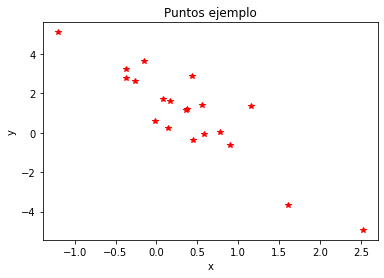

In [24]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

##### El ajuste

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar el ajuste: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

In [25]:
# el tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
#Usaremos ngrado = 1 pues queremos ajustar una recta
ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)

In [26]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes)

array([-2.65,  2.03])


Entonces nuestro polinomio es: $$p_{1}(x) = -2.65x + 2.03$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 2.03$, $\hat{\beta_1} = -2.65$.

##### La gráfica

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [27]:
y_ajustadas_numpy = coeficientes[1] + coeficientes[0] * x

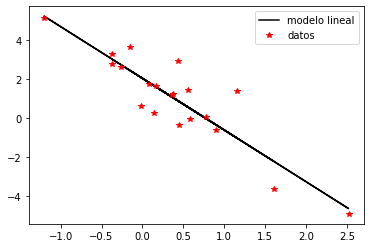

In [28]:
plt.plot(x, y_ajustadas_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

##### También podemos obtener lo anterior con la factorización QR:

In [29]:
#construimos a la matriz A:
A=np.ones((mpoints,2))

In [30]:
A[:,1] = x

In [31]:
A

array([[ 1.  , -0.26],
       [ 1.  ,  0.09],
       [ 1.  ,  0.43],
       [ 1.  ,  0.9 ],
       [ 1.  ,  0.56],
       [ 1.  ,  0.44],
       [ 1.  ,  0.38],
       [ 1.  , -0.15],
       [ 1.  ,  0.78],
       [ 1.  , -0.02],
       [ 1.  ,  1.61],
       [ 1.  , -0.37],
       [ 1.  ,  0.36],
       [ 1.  ,  0.17],
       [ 1.  ,  2.52],
       [ 1.  ,  0.14],
       [ 1.  ,  1.16],
       [ 1.  ,  0.59],
       [ 1.  , -1.2 ],
       [ 1.  , -0.37]])

In [32]:
Q,R = np.linalg.qr(A)

In [33]:
#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta)

array([ 2.03, -2.65])


In [34]:
y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

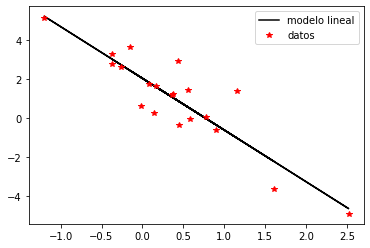

In [35]:
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')
plt.show()

**También podemos obtener el ajuste anterior con optimización numérica**:

$$f_o=\displaystyle \sum_{i=0}^{20} (y_i -f(x_i|\beta))^2 = \displaystyle \sum_{i=0}^{20} (y_i - (\beta_0 + \beta_1 x_i))^2 = ||y - A \beta||_2^2$$

con $y \in \mathbb{R}^{20}, A \in \mathbb{R}^{20 \times 2}, \beta \in \mathbb{R}^2$.

Problema de optimización numérica:

$$\displaystyle \min_{\beta \in \mathbb{R}^n} ||y - A\beta||_2^2$$

**¿Solución?**

Reescribimos $f_o$ como $f_o(\beta) = (y-A\beta)^T(y-A\beta) = y^Ty-2\beta^TA^Ty + \beta^TA^TA\beta$, observa que esta última expresión es un número $\mathbb{R}$. 

Por lo anterior: $\nabla f_o(\beta) = -2A^Ty + 2A^TA\beta$. Esto conduce a una forma **cerrada** de la solución a la ecuación (no lineal): $\nabla f_o(\beta)= 0$ dada por $A^TA \beta=A^Ty$ (que son las ecuaciones normales!).

La solución como la encontramos en el ejemplo anterior es considerar un método iterativo en el que iniciamos con un punto inicial $x^{(0)}$ y las actualizaciones se realizan con el gradiente:

$$x^{(k)} = x^{(k-1)} - \nabla f\left(x^{(k-1)}\right), k=1,2,\dots$$

Y como el óptimo de $-2A^Ty + 2A^TA\beta$ es el mismo que $A^Ty + A^TA\beta$, utilizamos esta última expresión (que corresponde a $f_o = \frac{1}{2}y^Ty-\beta^TA^Ty + \frac{1}{2}\beta^TA^TA\beta$).

In [36]:
cte=-np.transpose(A)@y

In [37]:
cte

array([-20.1,  23.7])

In [38]:
gf = lambda beta_fun: cte + np.transpose(A)@(A@beta_fun)
    #observa que no hacemos la multiplicación (A^T*A)*beta, mejor hacemos
    #primero A*beta y luego multiplicacmos por A^T

In [39]:
beta_0 = np.array([0,0])

In [40]:
t_0=.130

In [41]:
beta_1 = beta_0 - t_0*gf(beta_0)

In [42]:
beta_1

array([ 2.61, -3.08])

In [43]:
t_1=.0625

In [44]:
beta_2 = beta_1 - t_1*gf(beta_1)

In [45]:
beta_2

array([ 2.09, -2.97])

In [46]:
t_2 = .0625

In [47]:
beta_3 = beta_2 - t_2*gf(beta_2)

In [48]:
beta_3

array([ 2.17, -2.71])

In [49]:
t_3 = .0625

In [50]:
beta_4 = beta_3 - t_3*gf(beta_3)

In [51]:
beta_4

array([ 2.02, -2.72])

In [52]:
t_4 = .0625

In [53]:
beta_5 = beta_4 - t_4*gf(beta_4)

In [54]:
beta_5

array([ 2.07, -2.66])

Con la Hessiana:

In [58]:
beta_1 = beta_0 - np.linalg.solve(np.transpose(A)@A,gf(beta_0))

In [59]:
beta_1

array([ 2.03, -2.65])

**Comentarios:**

* El cálculo anterior lo realizamos por lotes o *batch*. 
* El nombre de *batch* o lotes se utiliza pues la información de primer o segundo orden es calculada utilizando todos los datos.

## ¿Optimización numérica convexa?